# 서울시 업무추진비
* https://opengov.seoul.go.kr/expense
* "업무추진비"는 서울시는 업무추진에 대한 비용집행의 투명성을 제고하고자 공개된, 시장단을 비롯하여 4급 부서장 이상의 간부직 공무원의 업무추진비 집행내역이다.
* 데이터는 미리 크롤링된 데이터를 사용하였다. 데이터 출처 : [jy617lee/popular_restaurants_from_officials: 서울시 공무원의 업무추진비를 분석하여 진짜 맛집 찾기 프로젝트](https://github.com/jy617lee/popular_restaurants_from_officials) 

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/raw.csv", parse_dates=["집행일시"])
df.shape

(51456, 10)

In [3]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110)


In [4]:
df.tail()

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13:00,스타벅스 (중구 을지로 19)
51455,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,43,40000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:04:00,스타벅스 (중구 을지로 19)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51456 entries, 0 to 51455
Data columns (total 10 columns):
1소속부서    51456 non-null object
결제방법     51279 non-null object
구분       1479 non-null object
대상인원     51448 non-null object
부서명      51454 non-null object
연번       51456 non-null object
집행금액     51455 non-null float64
집행목적     51440 non-null object
집행일시     51455 non-null datetime64[ns]
집행장소     51421 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.9+ MB


In [6]:
print(df.shape)
df['연'] = df['집행일시'].dt.year.fillna(0).astype(int)
df['월'] = df['집행일시'].dt.month.fillna(0).astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day
df['시'] = df['집행일시'].dt.hour
df['요일'] = df['집행일시'].dt.dayofweek.fillna(7).astype(int)
print(df.shape)

(51456, 10)
(51456, 16)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51456 entries, 0 to 51455
Data columns (total 16 columns):
1소속부서    51456 non-null object
결제방법     51279 non-null object
구분       1479 non-null object
대상인원     51448 non-null object
부서명      51454 non-null object
연번       51456 non-null object
집행금액     51455 non-null float64
집행목적     51440 non-null object
집행일시     51455 non-null datetime64[ns]
집행장소     51421 non-null object
연        51456 non-null int64
월        51456 non-null int64
연월       51456 non-null object
일        51455 non-null float64
시        51455 non-null float64
요일       51456 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 6.3+ MB


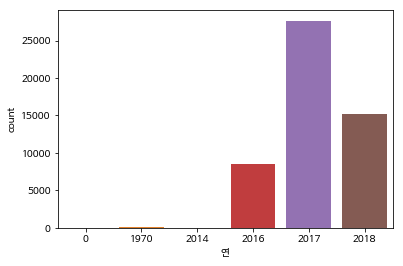

In [8]:
sns.countplot(data=df, x='연')

In [9]:
df = df.sort_values(by=['연', '월'], ascending=True)

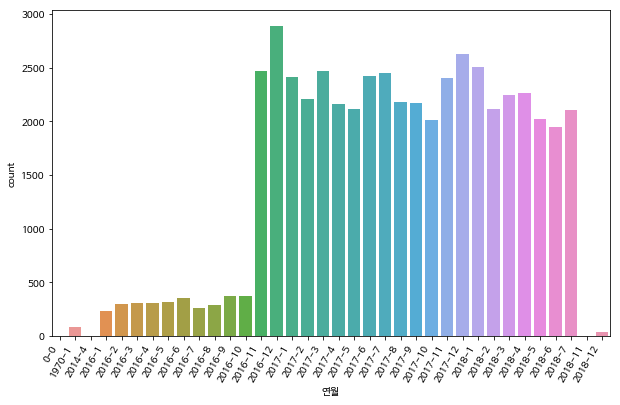

In [10]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=60, ha='right')
sns.countplot(data=df, x='연월')

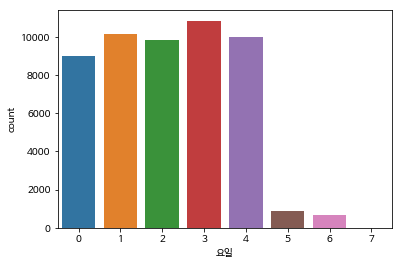

In [11]:
sns.countplot(data=df, x='요일')

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [13]:
text = ' '.join(df['집행목적'].fillna(''))

In [14]:
df['집행목적'].value_counts()

현안업무 추진직원 격려 간담회 개최비용 지급                    692
시정 운영 관련 유관부서 업무협의 간담회                      237
시정 홍보 강화를 위한 언론기관 간담회                       158
경조금 지급                                      144
시정 운영 관련 유관기관 의견수렴 간담회                      140
사회혁신 의제 발굴 논의 간담회                           129
시정현안 관련 국회 등 유관기관 업무협의 간담회                  125
시정 현안관련 유관기관 간담회                            120
시정 정책 추진 자문 간담회                             110
시정 현안관련 유관부서 간담회                            108
소속 상근직원 경조사비 지급                              99
시정 홍보 강화를 위한 의회 등 유관기관 간담회                   96
시정 현안 관련 유관부서 업무협의 간담회                       88
현안업무 추진 직원 격려 간담회 개최 비용 지급                   86
시정 정책 현안 관련 업무협의                             85
시정 홍보 강화를 위한 국회 등 유관기관 간담회                   85
내방객 접대용 다과구매(기획관)                            83
시정 현안 관련 언론기관 의견수렴 간담회                       82
서울혁신파크 활성화 방안 논의 간담회                         81
정무부시장실 직원 간담회 개최                             80
현안 업무추진관련 간담회 개최 비용 지급                  

In [15]:
def spend_gubun(spend):
    spend = spend.strip()
    if spend == np.nan:
        gubun = spend
    elif '간담회' in spend:
        gubun = '간담회'
    elif '격려' in spend:
        gubun = '격려'
    elif '물품구입' in spend:
        gubun = '물품구입'
    elif bool(re.search(r'경조[사|금|비]', spend)):
        gubun = '경조사'
    elif bool(re.search(r'식사|회식', spend)):
        gubun = '회식'
    else:
        gubun = spend
    return gubun

In [16]:
spend_gubun('격려지급')

'격려'

In [17]:
df['집행목적'] = df['집행목적'].fillna('')

In [18]:
df['집행구분'] = df['집행목적'].apply(spend_gubun)
spend_gubun = ' '.join(df['집행구분'])
spend_gubun[:100]

' 시정 현장방문 관련 업무협의 간담회 격려 시정 일정 및 현장방문 관련 업무협의 사망직원 유족 위로금 지급 간담회 결혼축하품 구입비 지출 시정 노고 직원 생일 축하품 구입비 지급 '

In [19]:
spend_gubun = spend_gubun.replace("  ", " ")

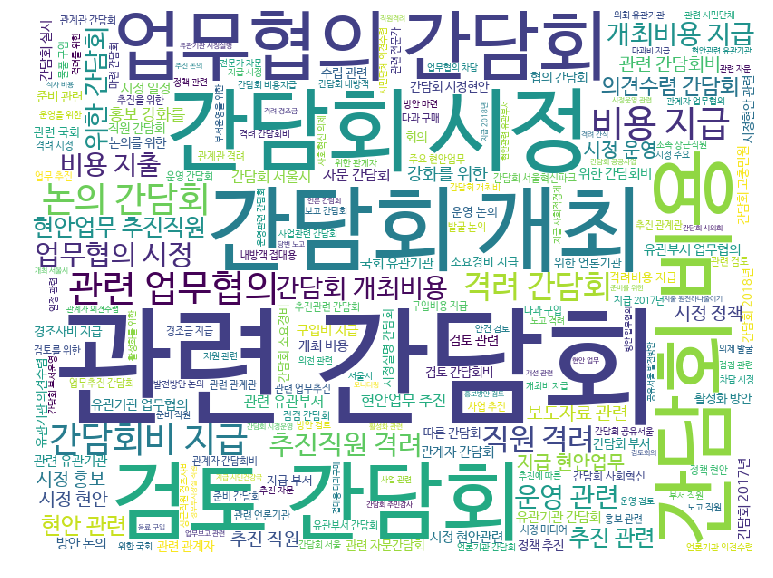

In [20]:
displayWordCloud(text)

In [21]:
df["집행구분"].value_counts()

간담회                                 38328
격려                                   3545
경조사                                   676
회식                                    293
물품구입                                  107
시정 정책 현안 관련 업무협의                       85
내방객 접대용 다과구매(기획관)                      83
시정 일정 및 의전 관련 업무협의                     68
시정 일정 관련 업무협의                          59
시정 비서실 현안 관련 업무협의                      54
부시장실 운영 다과 및 물품 구입                     51
시정 미디어 현안 관련 업무협의                      45
부서 직원의 사기앙양을 위한 간식비 지급                 44
시정 일정 및 현장방문 관련 업무협의                   43
기강감찰 행정소요경비 지급                         40
시정현안회의용 다과 구매                          39
내방객 응대를 위한 다과구매                        36
시정 일정 관련 업무협의 차담                       31
축.부의금 지급                               31
시정 일정 및 비서 관련 업무협의                     31
시정 정책 추진 관련 업무협의                       30
부서운영 다과물품 구입비 지급                       30
시정 일정 및 수행 관련 업무협의                     26
시정현안 회의용 간식류 구입                   

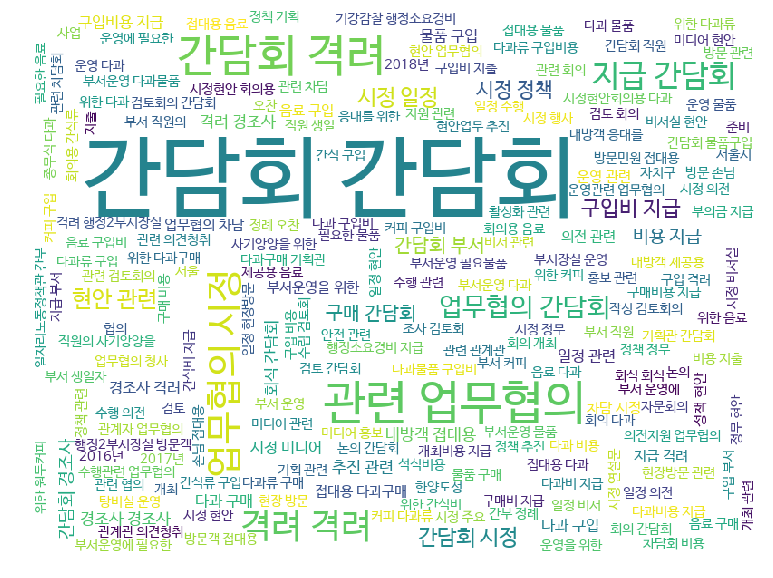

In [22]:
displayWordCloud(spend_gubun)

In [23]:
df['집행장소'] = df['집행장소'].fillna('')
df['상호명'] = df['집행장소'].apply(lambda x : x.split('(')[0].strip())

In [24]:
df[df['상호명'] == '']['집행목적'].value_counts().head()

현안업무 추진직원 격려 간담회 개최비용 지급    7
상수도사업본부직원경조사비 지급            4
도시기반시설본부직원 경조사비 지급          3
부서운영을 위한 원두커피 구입비 지급        3
찾아가는 동주민센터 연석회의 비용지출        2
Name: 집행목적, dtype: int64

In [25]:
df_shop = df.loc[ (df['상호명'] != '-') & (df['상호명'] != '') ]

print(df.shape)
print(df_shop.shape)

(51456, 18)
(50642, 18)


In [26]:
df_shop['상호명'].value_counts().head(30)

참숯골           773
우도일식          729
서울시청매점        700
구이구이          647
곰국시집          494
서울시청구내식당      409
동해일식          399
무교소호정         362
동해수산          331
바닷가작은부엌       319
스타벅스          319
라칸티나          309
한가람           308
동원참치          304
더테이블한정식       295
삼우정           278
어미가           276
제일가든          274
파리바게뜨         259
오리마당          259
월향            256
복성각           256
열빈            230
무교동낙지         229
남포면옥          223
（주）바닷가작은부엌    217
포메인           205
서라벌           205
마마스           202
대상자 소속부서      199
Name: 상호명, dtype: int64

In [27]:
df.loc[df['상호명'] == '（주）바닷가작은부엌', "상호명"] = "바닷가작은부엌"

In [28]:
top_50 = df_shop['상호명'].value_counts().head(50)
top_50 = pd.DataFrame(top_50).reset_index()
top_50.columns = ['상호명', '횟수']
top_50

,상호명,횟수
0,참숯골,773
1,우도일식,729
2,서울시청매점,700
3,구이구이,647
4,곰국시집,494
5,서울시청구내식당,409
6,동해일식,399
7,무교소호정,362
8,동해수산,331
9,바닷가작은부엌,319


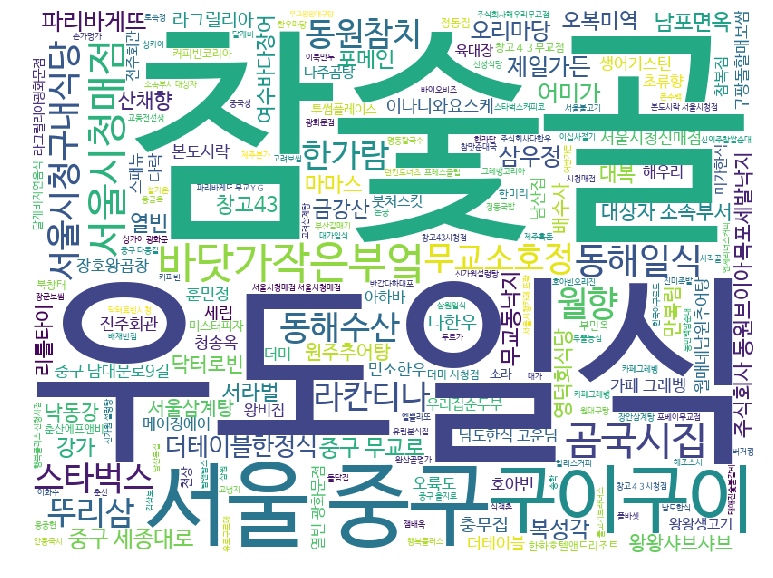

In [29]:
displayWordCloud(' '.join(df_shop['상호명']))